In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Data/Bitcoin Pulse  Hourly Dataset from Markets Trends and Fear.csv')

1- Overview du dataset

In [5]:
df.shape

(17516, 99)

In [10]:
df.head()

,timestamp,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,...,Open_sp500,Volume_sp500,btc_dominance,altcoin_market_cap,fear_greed_index,trend_bitcoin,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest
0,2023-04-09 00:00:00,310.5739,311.1801,310.4821,311.1801,28.717,27943.39,28073.95,27930.31,28035.04,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
1,2023-04-09 01:00:00,311.1801,311.6257,311.1489,311.6132,15.980,28035.04,28080.00,28029.69,28075.72,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
2,2023-04-09 02:00:00,311.6132,311.8623,311.2814,311.2814,37.265,28075.72,28080.84,28027.47,28033.86,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
3,2023-04-09 03:00:00,311.2814,311.4965,311.0072,311.2450,22.836,28033.86,28047.09,28019.16,28025.87,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
4,2023-04-09 04:00:00,311.2450,311.3736,311.0723,311.1659,44.535,28025.87,28038.02,28016.28,28036.28,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17516 entries, 0 to 17515
Data columns (total 99 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 17516 non-null  object 
 1   BNB_USDT_1h_open          17516 non-null  float64
 2   BNB_USDT_1h_high          17516 non-null  float64
 3   BNB_USDT_1h_low           17516 non-null  float64
 4   BNB_USDT_1h_close         17516 non-null  float64
 5   BNB_USDT_1h_volume        17516 non-null  float64
 6   BTC_USDT_1h_open          17516 non-null  float64
 7   BTC_USDT_1h_high          17516 non-null  float64
 8   BTC_USDT_1h_low           17516 non-null  float64
 9   BTC_USDT_1h_close         17516 non-null  float64
 10  BTC_USDT_1h_volume        17516 non-null  float64
 11  DOGE_USDT_1h_open         17516 non-null  float64
 12  DOGE_USDT_1h_high         17516 non-null  float64
 13  DOGE_USDT_1h_low          17516 non-null  float64
 14  DOGE_U

On peut voir qu'il n'y a aucunne valeur vide

In [12]:
df.describe()

,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,BTC_USDT_1h_volume,...,VIX_Close ^VIX,VIX_High ^VIX,VIX_Low ^VIX,VIX_Open ^VIX,VIX_Volume ^VIX,funding_rate,fear_gread_index,open_interest,google_trends_buy_crypto,google_trends_bitcoin
count,17515.000000,17515.000000,17515.000000,17515.000000,17515.000000,17515.000000,17515.000000,17515.000000,17515.000000,17515.000000,...,17515.000000,17515.000000,17515.000000,17515.000000,17515.0,17515.000000,17515.000000,17515.000000,17515.000000,17515.000000
mean,452.026374,453.859048,450.048366,452.040836,1073.994036,57127.435381,57335.735554,56913.599273,57130.554027,610.746483,...,16.255963,16.417220,16.112180,16.266876,0.0,0.000250,58.440708,51009.962285,25.644876,38.735884
std,174.379062,175.252661,173.424565,174.379698,1561.663449,24161.471981,24271.991515,24049.768199,24161.533458,631.852879,...,4.452735,4.623598,4.280131,4.447786,0.0,0.000211,16.512700,208.015759,15.798779,14.776331
min,203.532800,204.606700,202.026800,203.532800,7.359880,24924.360000,24974.050000,24394.740000,24924.360000,7.718360,...,11.550000,11.560000,10.620000,11.520000,0.0,-0.000294,10.000000,47009.394000,12.000000,23.000000
25%,250.015200,251.200800,248.952400,250.015200,242.196680,30587.075000,30663.915000,30508.585000,30587.825000,197.421321,...,13.530000,13.590000,13.470000,13.550000,0.0,0.000100,48.000000,51018.926000,17.000000,29.000000
50%,529.998000,532.900100,527.000000,530.050000,598.440130,60110.030000,60330.000000,59825.630000,60115.890000,431.721989,...,15.180000,15.320000,15.050000,15.190000,0.0,0.000100,60.000000,51018.926000,21.000000,33.000000
75%,596.655000,598.420000,594.620000,596.655000,1312.541900,69663.375000,69904.045000,69440.080000,69663.720000,841.735054,...,17.530001,17.730000,17.350000,17.580000,0.0,0.000509,72.000000,51018.926000,26.000000,46.000000
max,783.950000,794.000000,775.850000,783.950000,44240.975550,108322.460000,109900.000000,107794.040000,108322.460000,15206.868300,...,59.240002,65.730003,56.730000,64.059998,0.0,0.001128,94.000000,53193.112000,100.000000,100.000000


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

2- Analyse et visualisation

    A- Les prix du marché

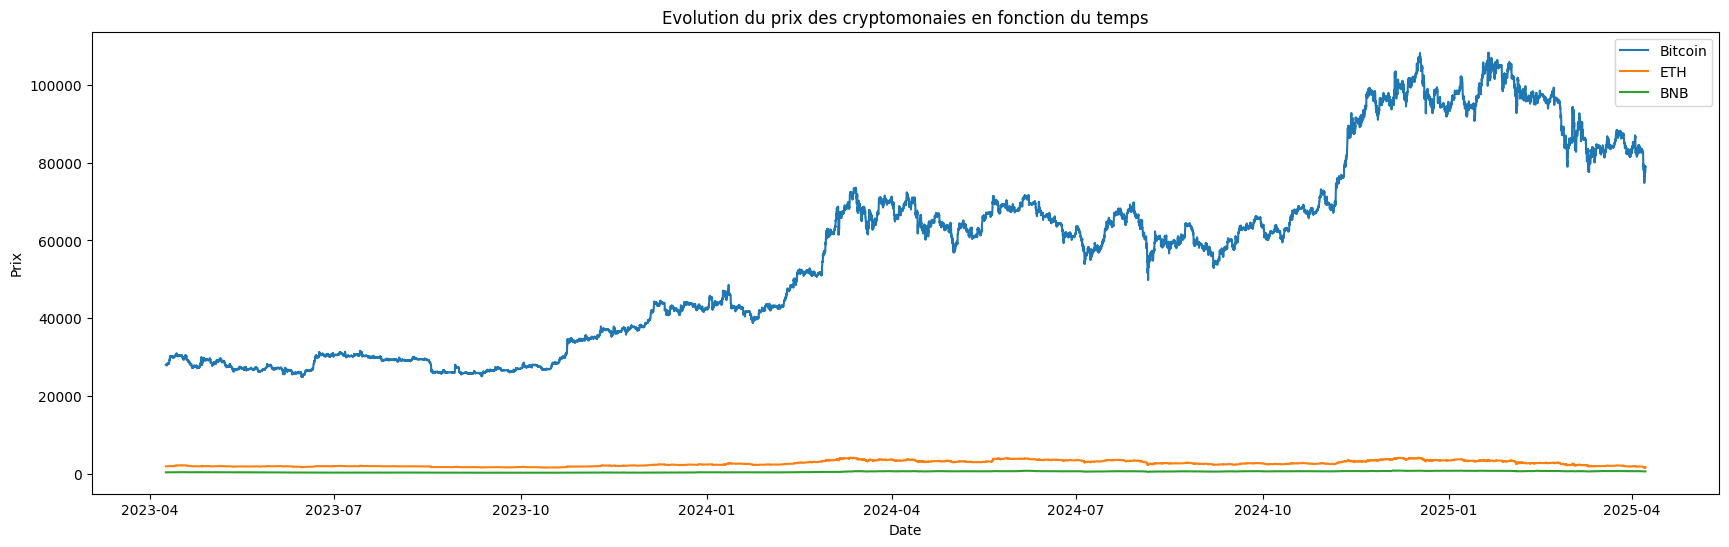

In [4]:
plt.figure(figsize=(21, 6))
sns.lineplot(x='timestamp', y='BTC_USDT_1h_close', data=df, label='Bitcoin')
sns.lineplot(x='timestamp', y='ETH_USDT_1h_close', data=df, label='ETH')
sns.lineplot(x='timestamp', y='BNB_USDT_1h_close', data=df, label='BNB')
plt.title('Evolution du prix des cryptomonaies en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()

Nous pouvons tout de suite comprendre la part de marché que le Bitcoin occupe. Et donc je vais focaliser mes analyses sur le Bitcoin

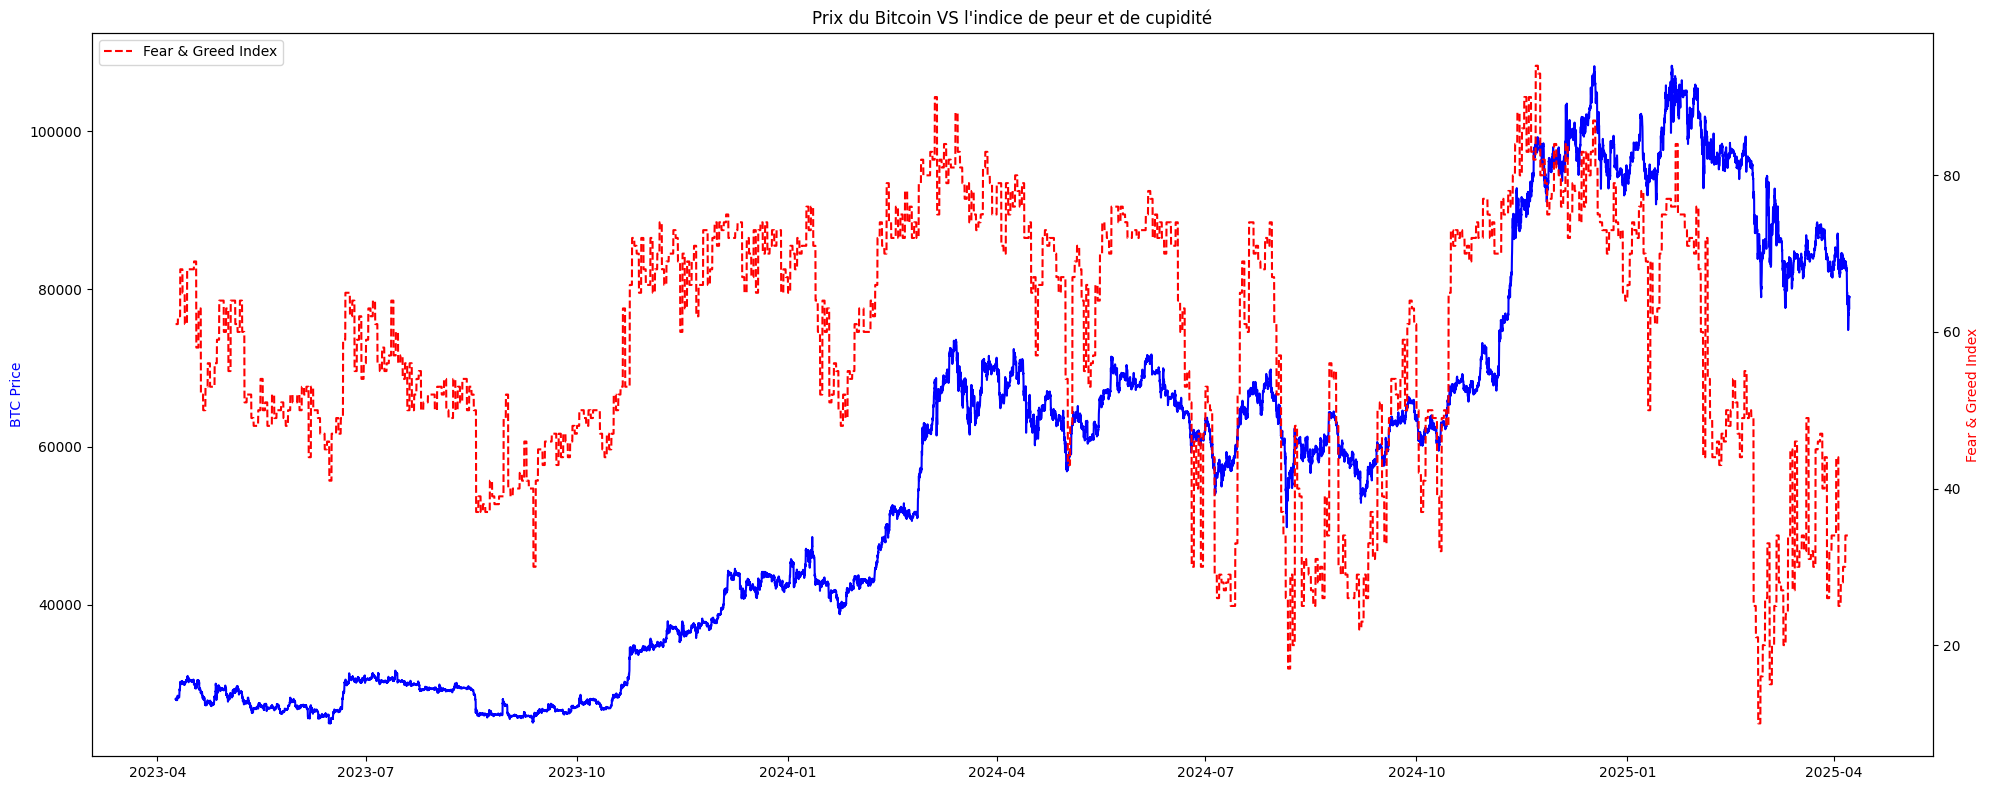

In [5]:
fig, ax1 = plt.subplots(figsize=(20, 8))

ax1.plot(df['timestamp'], df['BTC_USDT_1h_close'], color='blue', label='BTC Close')
ax1.set_ylabel('BTC Price', color='blue')

ax2 = ax1.twinx()
ax2.plot(df['timestamp'], df['fear_greed_index'], color='red', linestyle='--', label='Fear & Greed Index')
ax2.set_ylabel('Fear & Greed Index', color='red')

plt.title("Prix du Bitcoin VS l'indice de peur et de cupidité")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Le graphique met en évidence :
    Lorque l'indice de peur et de cupidité est élévé (phases de forte « cupidité ») les prix du Bitcoin sont en croissance ou élevés. 
    Tandis que lorsque l'indice de peur et de cupidité est bas (phases de « peur ») les prix ont tendance à être en décroissance ou bien dans un creux
Les variations rapides des sentiments semblent précéder des variations dans le prix du Bitcoin

On peut donc emettre l'hypothèse que les sentiments peuvent être un indicateur pour anticiper le marché 

ATTENTION : Il y a peut être une corrélation mais pas de causalité